In [1]:
import sys
sys.path.append("..")
import os, pickle, scipy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm_notebook as tqdm
from coh_tools import *
%matplotlib inline

/home/julien/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
os.chdir("/media/julien/hdd2tb/lab/elife/data")

In [3]:
experiments = pd.read_csv('table_of_experiments.csv')

In [4]:
stim_experiments = experiments.loc[experiments["stim_Coh_from"] != 0]

In [5]:
stim_experiments.head()

Experiment   Monkey  YYYYMMDD   Session PREAMP  \
0  Experiment1  MonkeyG  20150908  Session2     M1   
1  Experiment2  MonkeyG  20150908  Session3     M1   
2  Experiment3  MonkeyG  20150908  Session4     M1   
3  Experiment4  MonkeyG  20150909  Session2     M1   
4  Experiment5  MonkeyG  20150909  Session3     M1   

                          File Name  stim_Coh_from  stim_Coh_to  \
0  MonkeyG_20150908_Session2_M1.zip             46           63   
1  MonkeyG_20150908_Session3_M1.zip             48           43   
2  MonkeyG_20150908_Session4_M1.zip             48           16   
3  MonkeyG_20150909_Session2_M1.zip             48           12   
4  MonkeyG_20150909_Session3_M1.zip             53           27   

   Number of Lasers in Experiment  Number of Lasers during Conditioning Delay  \
0                               2                                     2  10ms   
1                               2                                     2  10ms   
2                               2                                     2  10ms   
3                               2                                     2  10ms   
4                               2                                     2  10ms   

                                            m1_sites  \
0  1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,1...   
1  1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,1...   
2  1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,1...   
3  1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,2,4...   
4  1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,2,4...   

                                            s1_sites  
0  50,52,54,56,57,58,59,60,61,62,63,64,65,66,67,6...  
1  50,52,54,56,57,58,59,60,61,62,63,64,65,66,67,6...  
2  50,52,54,56,57,58,59,60,61,62,63,64,65,66,67,6...  
3  10,33,34,35,36,37,54,56,57,58,59,60,61,62,63,6...  
4  10,33,34,35,36,37,54,56,57,58,59,60,61,62,63,6...

In [6]:
stim_experiments_list = stim_experiments["File Name"].tolist()
stim_experiments_list = [name[:-4] for name in stim_experiments_list]

In [7]:
# for ds in datestrings:
#     day_indexes.append(i)
    
#     ## can make this x2 parallel, but will need to make it a function
#     ## that yields lists, rather than appends to lists
#     for block in recblocks[ds]:
#         rec_indexes.append(i)
#         if block in stimblocks[ds]:
#             stim_indexes.append(i)
            
#         elfp = extract_lfp("/media/julien/hdd2tb/lab/PairedStimElectrical/"+ds+"/processed/lfp_"+str(block).zfill(2)+".mat")
#         num_splits = np.round(elfp.shape[1] / 3051 / 60)
#         elfp_splits = np.split(elfp[:, :int(elfp.shape[1]//num_splits * num_splits)], num_splits, axis=1)
#         for splits in elfp_splits:
#             if block in stimblocks[ds]:
#                 during_stim_indexes.append(i)
#             else:
#                 during_base_indexes.append(i)
#             c = coherence(splits, 3051, want_f=True)
#             for band in ["beta", "gamma", "high_gamma"]:
#                 band_range = get_band_range(band)
#                 r = get_freq_band_indices(c[0], band_range[0], band_range[1])
#                 c_band_coh = c[1][:, :, r[0]:r[1]].mean(axis=2)
#                 coh_matrices[band].append(c_band_coh)
#             i += 1
        
#         print(block)

In [87]:
os.listdir(experiment)

['TestingBlocks', 'RecordingBlocks', 'ConditioningBlocks']

In [89]:
os.listdir(experiment + '/TestingBlocks')

['TestBlock4.mat',
 'TestBlock5.mat',
 'TestBlock3.mat',
 'TestBlock6.mat',
 'TestBlock2.mat',
 'TestBlock1.mat']

In [ ]:
for directory_0 in os.listdir(experiment):
    for directory_1 in os.listdir(experiment+"/"+directory_0):
        experiment_blocks.append(experiment+"/"+directory_0+"/"+directory_1)
        print(directory_1)

In [97]:
# How to get list of all files 2 directories deep
experiment_blocks = []
for experiment in (stim_experiments_list):
    for directory_0 in os.listdir(experiment):
        doo = os.listdir(experiment+"/"+directory_0)
        doo.sort()

        print(doo[-1])

TestBlock6.mat
RecBlock6.mat
f.mat.JBwut
TestBlock6.mat
RecBlock6.mat
CondBlock5.mat
TestBlock6.mat
RecBlock6.mat
CondBlock5.mat
TestBlock6.mat
RecBlock6.mat
CondBlock5.mat
TestBlock6.mat
RecBlock6.mat
CondBlock5.mat
TestBlock6.mat
RecBlock6.mat
CondBlock5.mat
TestBlock6.mat
RecBlock6.mat
CondBlock5.mat
TestBlock6.mat
RecBlock6.mat
CondBlock5.mat
TestBlock6.mat
RecBlock6.mat
CondBlock5.mat
TestBlock6.mat
RecBlock6.mat
CondBlock5.mat
TestBlock6.mat
RecBlock6.mat
CondBlock5.mat
TestBlock6.mat
RecBlock6.mat
CondBlock5.mat
TestBlock6.mat
RecBlock6.mat
CondBlock5.mat
TestBlock6.mat
RecBlock6.mat
CondBlock5.mat
TestBlock6.mat
RecBlock6.mat
CondBlock5.mat
TestBlock6.mat
RecBlock6.mat
CondBlock5.mat
TestBlock6.mat
RecBlock6.mat
CondBlock5.mat
TestBlock6.mat
RecBlock6.mat
CondBlock5.mat
TestBlock6.mat
RecBlock6.mat
CondBlock5.mat
TestBlock6.mat
RecBlock6.mat
CondBlock5.mat
TestBlock6.mat
RecBlock6.mat
CondBlock5.mat
TestBlock6.mat
RecBlock6.mat
CondBlock5.mat
TestBlock6.mat
RecBlock6.mat
CondBl

In [96]:
experiment_blocks.sort()
experiment_blocks

['MonkeyG_20150908_Session2_M1/ConditioningBlocks/CondBlock1.mat',
 'MonkeyG_20150908_Session2_M1/ConditioningBlocks/CondBlock2.mat',
 'MonkeyG_20150908_Session2_M1/ConditioningBlocks/CondBlock3.mat',
 'MonkeyG_20150908_Session2_M1/ConditioningBlocks/CondBlock4.mat',
 'MonkeyG_20150908_Session2_M1/ConditioningBlocks/CondBlock5.mat',
 'MonkeyG_20150908_Session2_M1/ConditioningBlocks/f.mat.JBwut',
 'MonkeyG_20150908_Session2_M1/RecordingBlocks/RecBlock1.mat',
 'MonkeyG_20150908_Session2_M1/RecordingBlocks/RecBlock2.mat',
 'MonkeyG_20150908_Session2_M1/RecordingBlocks/RecBlock3.mat',
 'MonkeyG_20150908_Session2_M1/RecordingBlocks/RecBlock4.mat',
 'MonkeyG_20150908_Session2_M1/RecordingBlocks/RecBlock5.mat',
 'MonkeyG_20150908_Session2_M1/RecordingBlocks/RecBlock6.mat',
 'MonkeyG_20150908_Session2_M1/TestingBlocks/TestBlock1.mat',
 'MonkeyG_20150908_Session2_M1/TestingBlocks/TestBlock2.mat',
 'MonkeyG_20150908_Session2_M1/TestingBlocks/TestBlock3.mat',
 'MonkeyG_20150908_Session2_M1/Testin

In [100]:
range(1, 6)[-1]

5

In [102]:
t_block.shape

NameError: name 't_block' is not defined

In [118]:
filename = experiment+"/TestingBlocks/TestBlock"+str(block_num)+".mat"
f = h5py.File(filename, 'r')
keys = list(f.keys())
keys.sort()
i = 0
make_signals = True
for key in keys:
    if key.startswith('lfp'):
        if make_signals:
            signals = np.zeros((96, f[key].size))
            make_signals = False
    break
#         signals[i] = f[key][0]
#         i += 1


In [119]:
f[key].shape

(41, 100)

In [120]:
f[key].size

4100

In [125]:
t[0]

array([-2.06525259e-04,  7.10356850e-05,  9.77969729e-06, ...,
       -1.18917857e-04,  1.45422988e-04,  6.23318722e-06])

In [126]:
plt.plot(f[key][0])

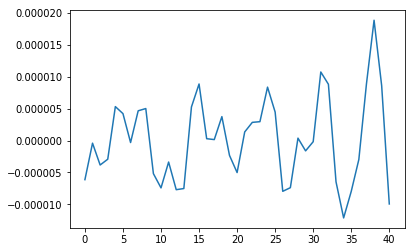

In [127]:
plt.plot(f[key][:,0])

In [101]:
print(str(len(stim_experiments_list)) + " experiments to analyze:")

# Each experiment will be a single matrix, saved as a pickle file
for experiment_i in tqdm(range(len(stim_experiments_list))): #For each experiment
    experiment = stim_experiments_list[experiment_i]
    experiment_raw_data = []
    
    for block_num in range(1, 7):
        # get the Record block data
        r_block = extract_lfp(experiment+"/RecordingBlocks/RecBlock"+str(block_num)+".mat")
        experiment_raw_data.append(r_block)

#         ## TODO: get test data together into a single matrix
#         # get the Test block data
#         t_block = extract_lfp(experiment+"/TestingBlocks/TestBlock"+str(block_num)+".mat")
#         experiment_raw_data.append(t_block)

#         # get the Condition block data
#         if block_num != 6:
#             c_block = extract_lfp(experiment+"/ConditioningBlocks/CondBlock"+str(block_num)+".mat")
#             experiment_raw_data.append(c_block)

    
    
    
    
    
#     file_location = experiment + "/RecordingBlocks/"
#     file_list = os.listdir(file_location) #This is for a single experiment
#     file_list.sort()
#     stim_index = 1
#     first = True
    
# #     fft_experiment_data = []
#     experiment_data = []
    
#     # For each iteration grab the Record, Test, Condition Blocks in order:
#     # TCR, (CRT*n)
#     # and construct a single data matrix.
#     # Then break the large matrix up into seconds and calculate the fft for each
#     # 2 second window.
#     # Toss the extraneous frequency terms and this should be in the right format already.
#     for filename in file_list:
#         if not filename.endswith(".mat"):
#             continue
#         baseline_filename = file_location + filename
#         savenamebase = experiment[:-3] + filename[:-4]
        
#         base_data, sample_freq = extract_lfp(baseline_filename, True)
        
#         if not first: #then also get conditioning block, using one lower index
#             stim_filename = baseline_filename.replace("Recording", "Conditioning").\
#                 replace("RecBlock"+str(stim_index+1), "CondBlock"+str(stim_index))
#             stim_data = extract_lfp(stim_filename)
            
#             stim_cohy = coherency(stim_data, sample_freq)
#             # Get rid of frequencies above 200Hz
#             stim_cohy = stim_cohy[:, :, :3223]

#             # add matrices to lists
#             stim_matrices.append(stim_cohy)
#             stim_index += 1
            
#         first = False
        
#     base_matrices = np.array(base_matrices)
#     stim_matrices = np.array(stim_matrices)

63 experiments to analyze:


ValueError: could not broadcast input array from shape (100) into shape (4100)

In [ ]:
        # split the data into second long windows
        num_splits = np.round(base_data.shape[1] / sample_freq)
        
        base_data_splits = np.asarray(np.split(base_data[:, :int(base_data.shape[1]//num_splits * num_splits)], num_splits, axis=1))
#         break
#     break

        seconds, num_channels, npersec = base_data_splits.shape # seconds, channels, datapoints
        nfft = nextpow2(npersec*2) # this will have to be hardcoded to ensure same freqs
    
        for window_i in range(seconds - 2):
            two_second_data = np.hstack(base_data_splits[window_i:window_i+2, :, :])
            hamming_window = np.hamming(npersec*2)
            fft_data = np.fft.rfft(two_second_data*hamming_window, n=nfft, axis=1)[1:403]
            freqs = np.fft.fftfreq(nfft, d=sample_freq**-1)[:fft_data.shape[1]-1][1:403]
#             low_f_i, high_f_i = get_freq_band_indices(freqs, 0, 200) # should be 1, 403
            
    # NEED TO FIGURE OUT FORMATTING OF DATA IN MATRICES ETC
            
        
            break
        break
    break

In [54]:
test.shape

(96, 1025)

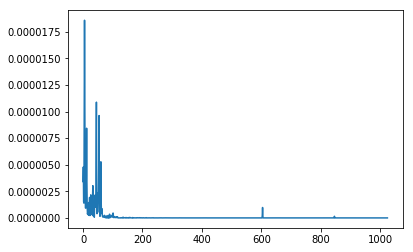

In [65]:
plt.plot(np.absolute(test[30])**2)

In [82]:
freqs = np.fft.fftfreq(nfft, d=sample_freq**-1)[:test.shape[1]-1]

In [69]:
sample_freq*-1

-1017.2526041666666

In [83]:
get_freq_band_indices(freqs, 0, 200)

[1, 403]

In [36]:
base_data.shape

(96, 21365)

In [37]:
np.asarray(base_data_splits).shape

(21, 96, 1017)

In [38]:
len(base_data_splits)

21

In [39]:
42*508

21336

In [40]:
num_splits

21.0

In [41]:
sample_freq

1017.2526041666666

In [42]:
base_data_splits = np.asarray(base_data_splits)
two_second_data = base_data_splits[0:2, :, :]
scipy.fftpack.rfft(two_second_data, n=nfft, axis=2)
windowed_second = np.hamming(nfft)

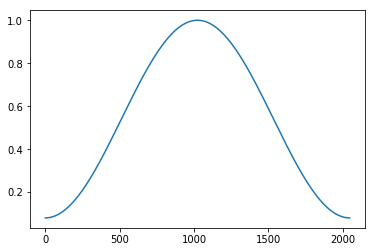

In [43]:
plt.plot(windowed_second)

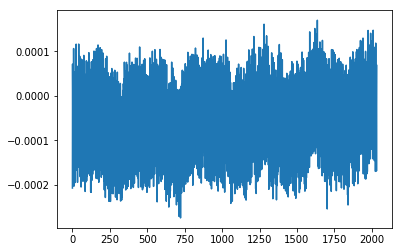

In [45]:
plt.plot(np.hstack(two_second_data)[0])

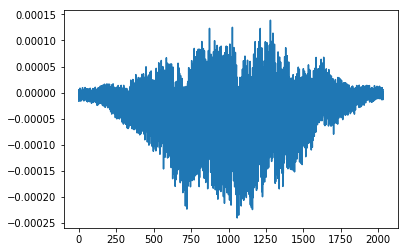

In [47]:
plt.plot(np.hstack(two_second_data)[0] * windowed_second[:2034])